## Author : Priteshkumar Gohil

In [12]:
import sys 
if('/opt/ros/kinetic/lib/python2.7/dist-packages' in sys.path):
    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
# playing video from file

cap = cv2.VideoCapture('data/01front_rgb.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',frame)
    if cv2.waitKey(15) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



In [ ]:
vidcap = cv2.VideoCapture('data/crisp_50_797_back_2.mp4')
success,image = vidcap.read()
count = 0
# 18x18 = 324  frames in total 
length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print("length",length)
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
print("FPS", fps )
duration = length / fps

images = []
while success:
    # In first 5 seconds of video, capture 1 frame per second
    if(count < 5*fps):
        if(count%18)==0:
            images.append(image) #BGR image
#             images.append(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)) #for RGB image
#             images.append(Image.fromarray(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))) #for PIL RGB image
            cv2.imshow("img", image)
            cv2.waitKey(200)
    # In second 8 seconds (i.e. 6 to 13 sec) of video capture 3 frame per second
    if(count > 5*fps and count < 13*fps):
        if(count%6)==0:
            images.append(image)
            cv2.imshow("img", image)
            cv2.waitKey(200)
    # In last 5 seconds (i.e. 14 to 18 sec) of video capture 1 frame per second
    if(count > 13*fps and count < 18*fps):
        if(count%18)==0:
            images.append(image)
            cv2.imshow("img", image)
            cv2.waitKey(200)    
    success,image = vidcap.read()
#     print('Read a new frame: ', success)
    count += 1
cv2.destroyAllWindows()
len(images)

## 64 frames per video

In [ ]:
vidcap = cv2.VideoCapture('data/crisp_50_797_back_2.mp4')
# vidcap = cv2.VideoCapture('data/fail_bottle_front_rgb.mp4')
# vidcap = cv2.VideoCapture('data/07front_rgb.mp4')

# 18x18 = 324  frames in total 
length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print("length",length)
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
print("FPS", fps )
duration = length / fps
print("duration" ,duration)
frame_no = (length /(duration*fps))
print("frame number" , frame_no)
required_frames = 64
frame_output = 5
# vidcap.set(length,frame_no)

# #future implementation
# start = 3 #second
# middle = duration-3 #3second to duration-3 second
# stop = duration #greater than middle and less than duration
# print(start,middle,stop)

success,image = vidcap.read()
count = 0
images = []
while success:
    if((count%5)==0 and (len(images)<required_frames)):
        images.append(image)
    success,image = vidcap.read()
    count += 1
print("captured frame", len(images))
missing_frames = 64 - len(images)
print("missing_frames = ", missing_frames)
#remove multiple of missing frames from the images. ex. if missing frame 4, remove quotient(4/5)+1 and add 4+1 last frames
# Ex. if missing frame 15, remove (15/5)+1 and add 15+1 last frames

# images.pop()
if(missing_frames):
    remove_element = (missing_frames//frame_output)+1
    del images[-remove_element:]


    vidcap = cv2.VideoCapture('data/crisp_50_797_back_2.mp4')
    # vidcap = cv2.VideoCapture('data/fail_bottle_front_rgb.mp4')
    # vidcap = cv2.VideoCapture('data/07front_rgb.mp4')
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, length-missing_frames-1)
    success,image = vidcap.read()
    while success:
        images.append(image)
        success,image = vidcap.read()
len(images)

In [ ]:
for i in images:
    cv2.imshow("im",i)
    cv2.waitKey(200)
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

In [ ]:
# cv2.imshow("im", images[0])
# cv2.waitKey(1000)
# cv2.destroyAllWindows()

plt.imshow(Image.fromarray(cv2.cvtColor(images[0],cv2.COLOR_BGR2RGB)))
# https://stackoverflow.com/questions/43232813/convert-opencv-image-format-to-pil-image-format?noredirect=1&lq=1

In [ ]:
import cv2
vidcap = cv2.VideoCapture('data/16front_rgb.mp4')
success,image = vidcap.read()
count = 0
# 18x18 = 324  frames in total 

length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print("length",length)
while success:
    if(count%5)==0:
#         cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
        cv2.imshow("img", image)
        cv2.waitKey(200)
    success,image = vidcap.read()
#     print('Read a new frame: ', success)
    count += 1
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture('data/16front_rgb.mp4')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )
length = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print( length )
length = int(cap.get(cv2.CAP_PROP_FPS))
print( length )
length = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
print( length )

## image frames from the video into list

In [ ]:

vidcap = cv2.VideoCapture('data/crisp_50_797_back_2.mp4')
success,image = vidcap.read()
count = 0
# 18x18 = 324  frames in total 
length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print("length",length)
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
print("FPS", fps )
duration = length / fps

images = []
while success:
    # In first 5 seconds of video, capture 1 frame per second
    if(count < 5*fps):
        if(count%18)==0:
            images.append(image) #BGR image
#             images.append(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)) #for RGB image
#             images.append(Image.fromarray(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))) #for PIL RGB image
    # In second 8 seconds (i.e. 6 to 13 sec) of video capture 3 frame per second
    if(count > 5*fps and count < 13*fps):
        if(count%6)==0:
            images.append(image)
    # In last 5 seconds (i.e. 14 to 18 sec) of video capture 1 frame per second
    if(count > 13*fps and count < 18*fps):
        if(count%18)==0:
            images.append(image) 
    success,image = vidcap.read()
#     print('Read a new frame: ', success)
    count += 1
len(images)

## plot for Scrub 150-866 top-5 tactile

Scrub 150-866 top-5 tactile


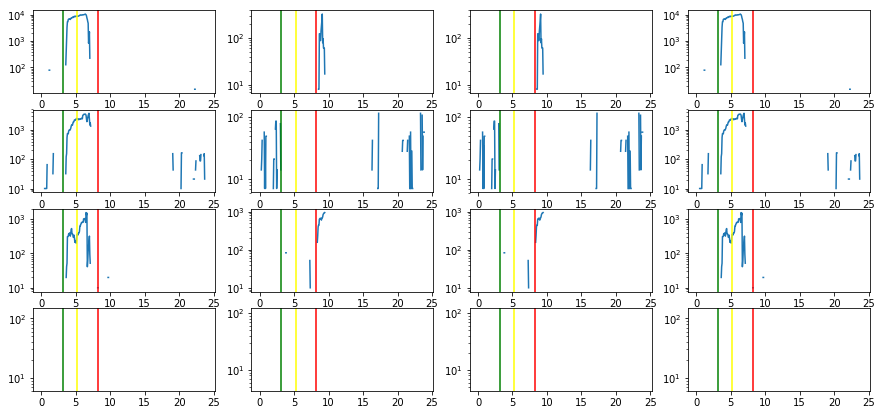

3.12 5.22 8.219999999999999


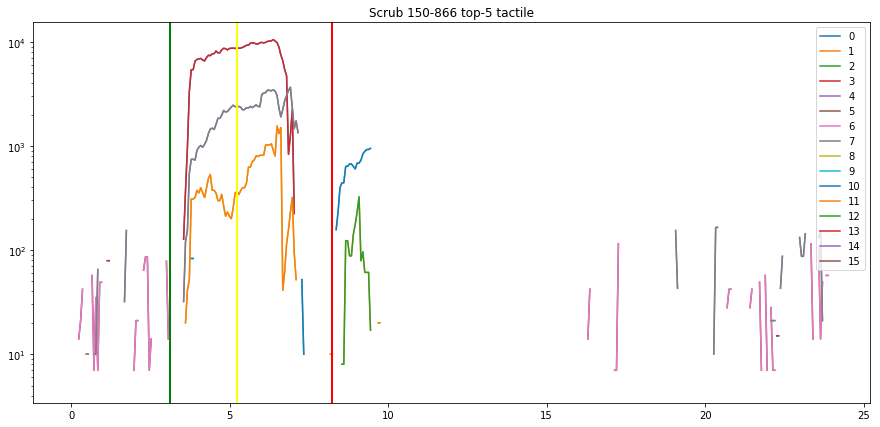

In [2]:
a = np.loadtxt("data/scrub_tactile.txt")
label = np.loadtxt("data/scrub_label.txt")
print("Scrub 150-866 top-5 tactile")
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))

#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.semilogy(time,a[:,i-1])
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.show()



plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))
#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq
for i in range(1,17):
    plt.semilogy(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("Scrub 150-866 top-5 tactile")
print(label[0]*t,label[1]*t,label[2]*t)

In [ ]:
a = np.loadtxt("data/scrub_pos.txt")
label = np.loadtxt("data/scrub_label.txt")
print("Scrub 150-866 top-5 tactile")
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))

#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq

for i in range(1,9):
    plt.subplot(4,2,i)
    plt.plot(time,a[:,i-1])
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.show()



plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))
#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq
for i in range(1,9):
    plt.plot(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("Scrub 150-866 top-5 position")
print(label[0]*t,label[1]*t,label[2]*t)
plt.show()

## Plot for Cola 150-26 right-8

In [ ]:
a = np.loadtxt("data/cola_tactile.txt")
label = np.loadtxt("data/cola_label.txt")
print("Cola 150-26 right-8")
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))

#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.semilogy(time,a[:,i-1])
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.show()


plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))
#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq
for i in range(1,17):
    plt.semilogy(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("Cola 150-26 right-8")
plt.show()

## crisp 50-797 back-2

3.1799999999999997 5.34 8.34


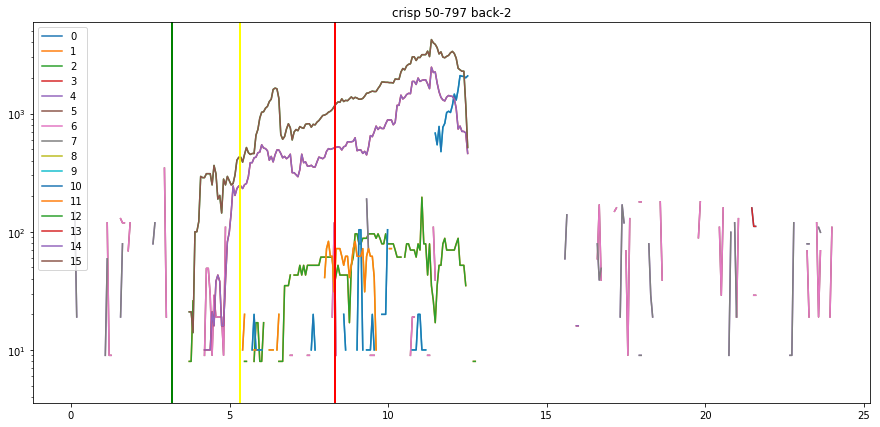

In [3]:
a = np.loadtxt("data/crisp_50_797_back_2_tactile.txt")
label = np.loadtxt("data/crisp_50_797_back_2_label.txt")
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))

#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq

for i in range(1,17):
    plt.semilogy(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("crisp 50-797 back-2")
print(label[0]*t,label[1]*t,label[2]*t)

In [ ]:
a = np.loadtxt("data/crisp_50_797_back_2_pos.txt")
label = np.loadtxt("data/cola_label.txt")
print("crisp 50-797 back-2")
# plt.figure(figsize=(15,7))
# time = np.linspace(0,24,len(a))

# #for tactile
# total_time = 24 
# samples = len(a)
# freq = samples/total_time
# t = 1 / freq

# for i in range(1,9):
#     plt.subplot(4,2,i)
#     plt.plot(time,a[:,i-1])
#     plt.axvline(label[0]*t, color="green")
#     plt.axvline(label[1]*t, color="yellow")
#     plt.axvline(label[2]*t, color="r")
# plt.show()


plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))
#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq
for i in range(1,9):
    plt.plot(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("crisp 50-797 back-2")
plt.show()

In [ ]:
import scipy as sc
import numpy
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise (ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise (ValueError, "Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise (ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

out = smooth(a[:,1])
# out = np.fft.fft(a)/400
plt.figure(figsize=(15,7))
plt.plot(abs(out))

In [ ]:
a = np.loadtxt("data/fail_latte_tactile.txt")
label = np.loadtxt("data/fail_latte_label.txt")
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))

#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq

for i in range(1,17):
    plt.semilogy(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("latte 150-620 top-8")
print(label[0]*t,label[1]*t,label[2]*t)

In [ ]:
a = np.loadtxt("data/fail_bottle_tactile.txt")
label = np.loadtxt("data/fail_bottle_label.txt")
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))

#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq

for i in range(1,17):
    plt.semilogy(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("water 150-1045 right-1 Tactile")
print(label[0]*t,label[1]*t,label[2]*t)
plt.show()

a = np.loadtxt("data/fail_bottle_pos.txt")
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))
#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq
for i in range(1,9):
    plt.plot(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("water 150-1045 right-1 Pos")
plt.show()

## upsampling tactile and position sensor data from 16.66667 to 18 samples per second

In [ ]:
from sklearn.utils import resample
from scipy import signal
# newa= resample(a, replace=True, n_samples = 300, random_state=123)
up_samples=24*18
newa = signal.resample(a,up_samples)
newa.shape

In [ ]:
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(newa))
#for tactile
total_time = 24 
samples = len(newa)
freq = samples/total_time
t = 1 / freq
time = np.linspace(0,24,len(newa))

for i in range(1,9):
    plt.plot(time,newa[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("water 150-1045 right-1 Pos")
plt.show()

# visualizing most confusing class Suger/50_240/back/9 . Looks like success but failure. video can't tell so we can only say something after looking tactile data for this particular class vs. some of the success class.

In [ ]:
a = np.loadtxt("data/tactile_suger_50_240_back_9_0.txt")
label = np.loadtxt("data/label_suger_50_240_back_9_0.txt")
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))
#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq
for i in range(1,17):
    plt.plot(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("Suger/50_240/back/9")
plt.show()



In [ ]:
a = np.loadtxt("data/tactile_suger_50_240_back_2_1.txt")
label = np.loadtxt("data/label_suger_50_240_back_2_1.txt")
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))
#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq
for i in range(1,17):
    plt.plot(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.title("Suger/50_240/back/9")
plt.show()



In [ ]:
a = np.loadtxt("data/tactile.txt")
label = np.loadtxt("data/label_suger_50_240_back_9_0.txt")
plt.figure(figsize=(15,7))
time = np.linspace(0,24,len(a))

#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.plot(time,a[:,i-1])
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="yellow")
    plt.axvline(label[2]*t, color="r")
plt.show()
plt.title("latte 150-620 top-8")
print(label[0]*t,label[1]*t,label[2]*t)

# plot for the report

4.14 6.24 9.24


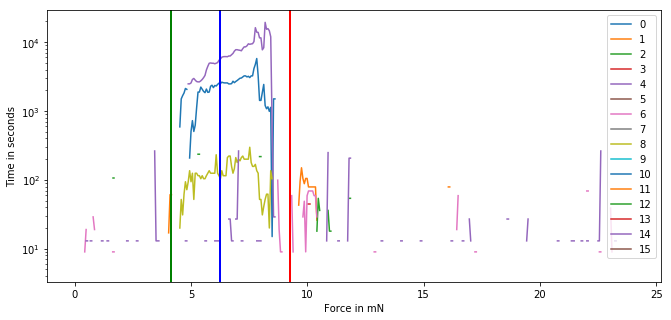

In [22]:
a = np.loadtxt("../../Visual-Tactile_Dataset/tactile_data/Coffeecup/150_470/right/5/tactile.txt")
label = np.loadtxt("../../Visual-Tactile_Dataset/dataset/Coffeecup/150_470/right/5/label.txt")
plt.figure(figsize=(11,5))
time = np.linspace(0,24,len(a))

#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq

for i in range(1,17):
    plt.semilogy(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="blue")
    plt.axvline(label[2]*t, color="r")
    
plt.xlabel("Force in mN")
plt.ylabel("Time in seconds")
plt.savefig("../images/tactileDatasetCoffee1.png")
print(label[0]*t,label[1]*t,label[2]*t)

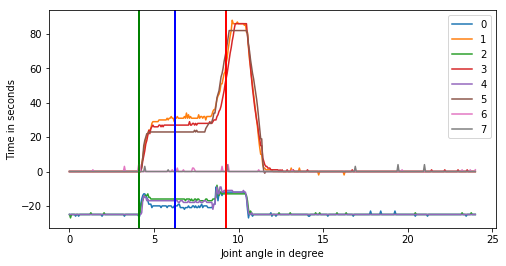

In [18]:
a = np.loadtxt("../../Visual-Tactile_Dataset/dataset/Coffeecup/150_470/right/5/pos.txt")
plt.figure(figsize=(8,4))
time = np.linspace(0,24,len(a))
#for tactile
total_time = 24 
samples = len(a)
freq = samples/total_time
t = 1 / freq
for i in range(1,9):
    plt.plot(time,a[:,i-1],label=(i-1))
    plt.legend()
    plt.axvline(label[0]*t, color="green")
    plt.axvline(label[1]*t, color="blue")
    plt.axvline(label[2]*t, color="r")
    
plt.xlabel("Joint angle in degree")
plt.ylabel("Time in seconds")
plt.savefig("../images/posDatasetCoffee1.png")
plt.show()

# Tactile and pos image analysis

[5.23915621e-02 0.00000000e+00 1.32502420e-02 6.75898908e-04
 1.09732174e-01 0.00000000e+00 1.58385631e-05 3.54568328e-04
 1.02107433e-01 1.48564707e-05 4.92695369e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.41401693e-05 0.00000000e+00]
[[0.00000000e+00 1.02107433e-01 1.48564707e-05 4.92695369e-05
  0.00000000e+00]
 [0.00000000e+00 5.23915621e-02 0.00000000e+00 1.32502420e-02
  6.75898908e-04]
 [0.00000000e+00 1.09732174e-01 0.00000000e+00 1.58385631e-05
  3.54568328e-04]
 [3.41401693e-05 1.02107433e-01 1.48564707e-05 4.92695369e-05
  0.00000000e+00]]


139

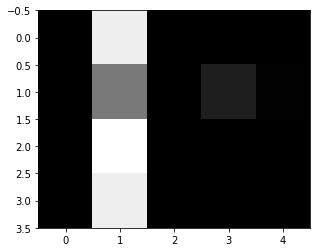

In [71]:
TACTILE_MAX_MAGNITUDE = np.array([23655, 20662, 14496,  6475, 41133, 64793, 59317, 33177, 19897,
       62084, 49874, 29170, 42944, 14976, 12311, 14331])
POS_MAX_MAGNITUDE = np.array([ 20,  91,  25, 109,  54,  87,  12,  21])
TAC_IMAGE_INDEX = np.array([[12,8,9,10,11],
                          [13,0,1,2,3],
                          [15,4,5,6,7],
                          [14,8,9,10,11]])
POS_IMAGE_INDEX = np.array([[0,6,7,0],
                  [5,1,3,5],
                  [4,0,2,4],
                  [0,6,7,0]])
                        
                           
TACTILE_TIME = 24
UPSAMPLE_FREQ = 18

def read_tactile_data(tac_path):
    up_samples=TACTILE_TIME*UPSAMPLE_FREQ
    with open(tac_path, 'rb') as f:
        tactile_frame = np.loadtxt(f)
        tactile = tactile_frame.astype('float')
        tactile = signal.resample(tactile,up_samples)
        tactile[np.where(tactile<0.1)] = 0.  # remove all the negative samples with 0
        tactile = tactile/TACTILE_MAX_MAGNITUDE #normalize input in range of 0 to 1.
        #tactile = 2*tactile - 1 # normalize in the range of 0 to 1
    return tactile

def get_offset(an_path, lbl_path):
    """
    Get the offset in samples between video and tactile data
    Args:   annotation_path - annotation.txt file containinf video frame alligned with label[0]
            label_path - path of label.txt
    """
    vid_fps = 18
    tac_fps = 16.67
    a = np.loadtxt(an_path)
    l = np.loadtxt(lbl_path)
#     print (annotation, label[0] * (vid_fps/tac_fps), label[2] * (vid_fps/tac_fps), int(annotation - label[0] * (vid_fps/tac_fps)),annotation_path)
    offset = int(a - l[0] * (vid_fps/tac_fps))
    if(offset <= 0):
        # raise ValueError("something wrong{},{}:{},{}".format(a,l[0] * (vid_fps/tac_fps),lbl_path, an_path))
        offset = 1
    return offset

# Enter this field
retrieve_tactile_for_video_frame = 225
#Picking up from finger tips
directory = "../../Visual-Tactile_Dataset/dataset/Suger/100_240/top/4/" #frame 225
# directory = "../../Visual-Tactile_Dataset/dataset/Tomato/100_286/top/4/" #frame 250
an_dir = directory.replace('dataset','dataset_annotations')
tac_dir = directory.replace('dataset','tactile_data')
vid_path = directory + "front_rgb.mp4"
label_path = directory + "label.txt"
an_path = an_dir + "video_grasp_timestamp.txt"
tac_path = tac_dir + "tactile.txt"

tac_data = read_tactile_data(tac_path)

#Calculate tactile of particular video frame to get image
offset = get_offset(an_path, label_path)
tactile_frame = retrieve_tactile_for_video_frame - offset

# get tactile data for particular frame (for loop if multiple frames)
t = tac_data[int(tactile_frame),:]
print(t)
t = t[TAC_IMAGE_INDEX.ravel()].reshape(4,5)
print(t)
plt.imshow(t,cmap = 'gray')
tactile_frame